# Clustering

See our notes on [unsupervised learning](https://jennselby.github.io/MachineLearningCourseNotes/#unsupervised-learning), [K-means](https://jennselby.github.io/MachineLearningCourseNotes/#k-means-clustering), [DBSCAN](https://jennselby.github.io/MachineLearningCourseNotes/#dbscan-clustering), and [clustering validation](https://jennselby.github.io/MachineLearningCourseNotes/#clustering-validation).

For documentation of various clustering methods in scikit-learn, see http://scikit-learn.org/stable/modules/clustering.html

The code was based on the example at http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html
which has the following comments:

Code source: Gaël Varoquaux<br/>
Modified for documentation by Jaques Grobler<br/>
License: BSD 3 clause

In [183]:
%matplotlib inline
import numpy
import matplotlib.pyplot
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import datasets

import pandas

In [184]:
# We can only plot 3 of the 4 iris features, since we only see in 3D.
# These are the ones the example code picked
X_FEATURE = 'petal width (cm)' 
Y_FEATURE = 'sepal length (cm)' 
Z_FEATURE = 'petal length (cm)'

X_FEATURE_2 = 'malignant'
Y_FEATURE_2 ='benign'

FIGURES_PER_ROW = 3 
FIGURES_PER_ROW_2 = 2 
MAX_CLUSTERS = 6 

In [185]:
def add_plot(figure, subplot_num, subplot_name, data, labels, max_plots):
    '''Create a new subplot in the figure.'''

    # create a new subplo
    axis = figure.add_subplot(FIGURES_PER_ROW, max_plots / FIGURES_PER_ROW, subplot_num, projection='3d',
                              elev=48, azim=134)

    # Plot three of the four features on the graph, and set the color according to the labels
    axis.scatter(data[X_FEATURE], data[Y_FEATURE], data[Z_FEATURE], c=labels)

    # get rid of the tick numbers. Otherwise, they all overlap and it looks horrible
    for axis_obj in [axis.w_xaxis, axis.w_yaxis, axis.w_zaxis]:
        axis_obj.set_ticklabels([])

    # label the subplot
    axis.title.set_text(subplot_name)

In [186]:
def add_plot_2(figure, subplot_num, subplot_name, data, labels, max_plots):
    '''Create a new subplot in the figure.'''

    # create a new subplo
    axis = figure.add_subplot(FIGURES_PER_ROW_2, max_plots / FIGURES_PER_ROW_2, subplot_num, projection='3d',
                              elev=48, azim=134)

    # Plot three of the four features on the graph, and set the color according to the labels
    axis.scatter(data[X_FEATURE_2], data[Y_FEATURE_2], c=labels)

    # get rid of the tick numbers. Otherwise, they all overlap and it looks horrible
    for axis_obj in [axis.w_xaxis, axis.w_yaxis, axis.w_zaxis]:
        axis_obj.set_ticklabels([])

    # label the subplot
    axis.title.set_text(subplot_name)

## Iris Dataset

Before you go on, if you haven't used the iris dataset in a previous assignment, make sure you understand it. Modify the cell below to examine different parts of the dataset that are contained in the iris dictionary object.

What are the features? What are we trying to classify?

In [187]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [188]:
iris_df = pandas.DataFrame(iris.data)
iris_df.columns = iris.feature_names
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Visualization

This is the correct labeling, based on the targets.

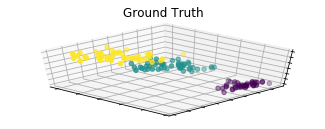

In [189]:
# start a new figure to hold all of the subplots
figure = matplotlib.pyplot.figure(figsize=(4*FIGURES_PER_ROW, MAX_CLUSTERS))

# Plot the ground truth
add_plot(figure, 1, "Ground Truth", iris_df, iris.target, max_plots = 6)

## Training and Visualization

Now let's see how k-means clusters the iris dataset, with various different numbers of clusters

[0.5193608056059371]
[0.7483723933229484]
[0.6456152164718862]
[0.5917891481655361]
[0.5103263045075749]


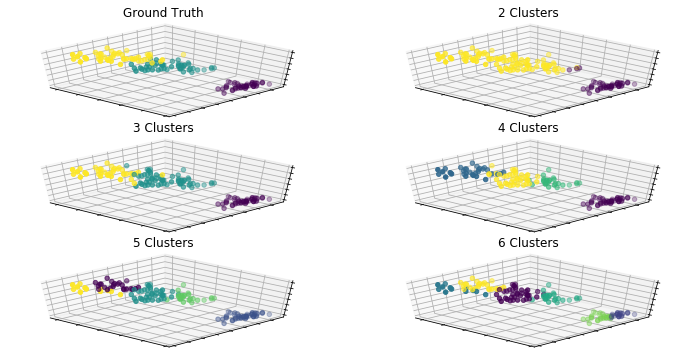

In [190]:
figure = matplotlib.pyplot.figure(figsize=(4*FIGURES_PER_ROW, MAX_CLUSTERS))
# Plot the ground truth
add_plot(figure, 1, "Ground Truth", iris_df, iris.target, max_plots = 6)

for num_clusters in range(2, MAX_CLUSTERS + 1):
    # train the model
    model = KMeans(n_clusters=num_clusters)
    model.fit(iris_df)
    # get the predictions of which cluster each input is in
    labels = model.labels_
    x = []
    x.append(metrics.adjusted_mutual_info_score(iris.target, labels))
    add_plot(figure, num_clusters, '{} Clusters'.format(num_clusters), iris_df, labels.astype(numpy.float), max_plots = 6)

    print(x) 

# Exercise

1. Add [validation](https://jennselby.github.io/MachineLearningCourseNotes/#clustering-validation) to measure how good the clustering is, with different numbers of clusters.
1. Run the iris data through DBSCAN clustering and validate that as well.
1. Comment on the validation results, explaining which models did best and why you think that might be.

In [191]:
# your code here
"""
for num_clusters in range(2, MAX_CLUSTERS + 1):
    # train the model
    db = DBSCAN(eps=0.3, min_samples=10).fit(X)
    # model = DBSCAN(n_clusters=num_clusters)
    model.fit(iris_df)
    # get the predictions of which cluster each input is in
    labels = model.labels_

    add_plot(figure, num_clusters, '{} Clusters'.format(num_clusters), iris_df, labels.astype(numpy.float))
    
"""

"\nfor num_clusters in range(2, MAX_CLUSTERS + 1):\n    # train the model\n    db = DBSCAN(eps=0.3, min_samples=10).fit(X)\n    # model = DBSCAN(n_clusters=num_clusters)\n    model.fit(iris_df)\n    # get the predictions of which cluster each input is in\n    labels = model.labels_\n\n    add_plot(figure, num_clusters, '{} Clusters'.format(num_clusters), iris_df, labels.astype(numpy.float))\n    \n"

[0.5609099839129877]


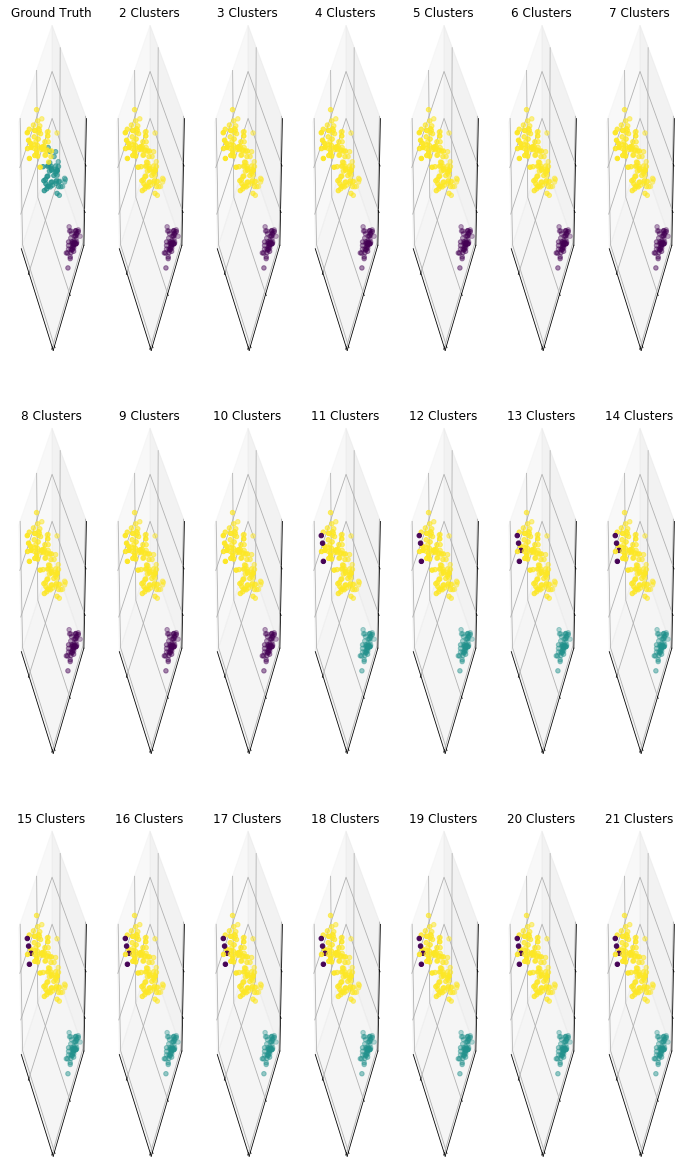

In [192]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

model2 = DBSCAN(eps=0.6, min_samples=5)
model2.fit(iris_df)

MAX_SAMPLES = 21 
min_samples = 5

figure = matplotlib.pyplot.figure(figsize=(4*FIGURES_PER_ROW, MAX_SAMPLES))
# Plot the ground truth
add_plot(figure, 1, "Ground Truth", iris_df, iris.target, max_plots = MAX_SAMPLES)

for num_samples in range(2, MAX_SAMPLES + 1):
    # train the model
    model2 = DBSCAN(eps=0.9, min_samples=num_samples)
    model2.fit(iris_df)
    x = []
    x.append(metrics.adjusted_rand_score(iris.target, labels))
    # get the predictions of which cluster each input is in
    labels = model2.labels_

    add_plot(figure, num_samples, '{} Clusters'.format(num_samples), iris_df, labels.astype(numpy.float), max_plots = MAX_SAMPLES)
    
    
print(x) 

In [193]:
"""

I appended the adjusting rand score for Kmeans and DBSCAN algorithim. The DBSCAN algorithim is seen right above. 

I notice while implementing the DBSCAN cluster the highest rand score for the algorithim is around 0.58. If I set the eps to something to high the rand score will be 0.0

"""

'\n\nI appended the adjusting rand score for Kmeans and DBSCAN algorithim. The DBSCAN algorithim is seen right above. \n\nI notice while implementing the DBSCAN cluster the highest rand score for the algorithim is around 0.58. If I set the eps to something to high the rand score will be 0.0\n\n'

In [196]:
#Usng rand score for Descision Tree 
from sklearn.datasets import load_iris
from sklearn import tree
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
breast_cancer = load_breast_cancer()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(breast_cancer.data, breast_cancer.target)
print(clf)
y = clf.predict(breast_cancer.data)
x = []
x.append(metrics.adjusted_rand_score(breast_cancer.target, y))
print(x)

#

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33, random_state=42)
#print(metrics.adjusted_rand_score(X_train, X_test))
#a = tree.DecisionTreeClassifier()
#a = a.fit(X_train, y_test)
#z = a.predict(iris.data)
type(metrics.adjusted_rand_score(a, iris.target))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
[1.0]


ValueError: labels_true must be 1D: shape is ()

In [ ]:
breast_cancer = load_breast_cancer()
print(breast_cancer.keys())
iris.feature_names
#iris.feature_names
#iris.data

In [ ]:
print(X_train)

In [ ]:
breast_cancer_df = pandas.DataFrame(breast_cancer.data)
breast_cancer_df.columns = breast_cancer.feature_names
breast_cancer_df.head()

KeyError: 'malignant'

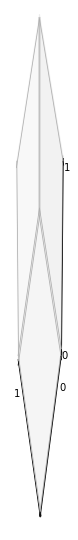

In [195]:
#Different DBSCAN

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import load_breast_cancer

FIGURES_PER_ROW = 3 
MAX_CLUSTERS = 6

breast_cancer = load_breast_cancer()

model3 = DBSCAN(eps=0.6, min_samples=5)
model3.fit(breast_cancer_df)

MAX_SAMPLES = 21 
min_samples = 5

figure = matplotlib.pyplot.figure(figsize=(4*FIGURES_PER_ROW, MAX_SAMPLES))
# Plot the ground truth
add_plot_2(figure, 1, "Ground Truth", breast_cancer_df, breast_cancer.target, max_plots = MAX_SAMPLES)

for num_samples in range(1, MAX_SAMPLES + 1):
    # train the model
    model3 = DBSCAN(eps=0.9, min_samples=num_samples)
    model3.fit(breast_cancer_df)
    x = []
    x.append(metrics.adjusted_rand_score(breast_cancer.target, labels))
    # get the predictions of which cluster each input is in
    labels = model3.labels_

    add_plot(figure, num_samples, '{} Clusters'.format(num_samples), breast_cancer_df, labels.astype(numpy.float), max_plots = MAX_SAMPLES)
    
    
print(x) 

In [ ]:
breast_cancer.keys()
breast_cancer.target_names